In [50]:
#*** this project is ZERO BASED index. Subject 1 is index 0 and subject 122 is index 121 ***

In [1]:
import os
#This method convert to text
def convertToTxt(path):
    for i in os.listdir(path):
        os.rename(dir + "/" + i, dir + "/" + i + ".txt")

In [2]:
#get all files in directory
def filesInDirectory(path):
    files = []
    for i in os.listdir(path):
        files.append(path  + "/" + i)
    return files

In [3]:
#Call each file here in subjects
# for b in os.listdir("Subjects"):
#     convertToTxt("Subjects/" + b)


In [3]:
#Now using pandas we will read each data trail and save it to an array of datasets that contain the eeg singal for each channel
import pandas as pd
import numpy as np
import scipy.linalg as la
from matplotlib import pyplot as plt

In [4]:
#This method is responsible for comiling a list of all of the samples
def collectTrialData(TrialNumber):
    with open(SubjectTrialDataset[TrialNumber]) as f:
        lines = f.readlines()
    channels = [[0] * 257 for _ in range(65)]
    #This method classfies which trail is stimuli
    for word in lines:
        if(word[2] == "S"):
            if(word[3] == "1"):
                channels[64][256] = "oneObject"
            if(word[3] == "2"):
                if(word[5] == "m"):
                    channels[64][256] = "twoObjectMatch"
                else:
                    channels[64][256] = "twoObjectNoMatch"
    #Clear top lines of code
    del lines[0:4]
    count = 0
    i = 0  
    #cleans out eeg data
    for line in lines:
        if(line[0] == "#"):
            line = line.replace("#", "")
            line = line.replace("\n", "")
            line = line.replace(",", "")
            line = line.lstrip()
            channels[i][0] = line
            i += 1  
        elif line[0] != "#":
            line = line.replace("\n", "")
            line = line.lstrip()
        #print(count)
    #print(channels)
    currChan = -1
    #Saves each eeg value to the matrix. 
    for line in lines:
        count += 1
        count = count % 257
        if(count == 1):
            #print(valsPerCol)
            currChan += 1
            z = 0
        #Data from cols
        if(count != 1):
            z += 1
            work = line.split(" ")
            #print(z-1)
            b = 0
            for w in work:
                b += 1
                b = b % 4
                if(b == 0):
                    w = w.replace("\n", "")
                    w = float(w)
                    channels[currChan][z-1] = w
    #Channel[channelNumber][Sample Number] = eegSignal
    #print(channels[0][0])
    return channels

In [5]:
def getPeople(path):
    listOFPeps = []
    for a in os.listdir(path):
        listOFPeps.append(a)
    return listOFPeps

In [6]:
listOfPeople = []


In [7]:
#returns number oof trials for the index number of subject ie 0 is subject 1
def getNumTrials(index):
    #print(listOfPeople[index])
    return (len(filesInDirectory("Subjects/" + listOfPeople[index])))
    

In [8]:
#returns number of trials for the index number of subject ie 0 is subject 1
def getTrialIndex(indexOfTrial, person):
    #print(listOfPeople[index])
    i = 0
    val = 0
    for i in range (person):
        val = val +  len(filesInDirectory("Subjects/" + listOfPeople[indexOfTrial]))
    return val+indexOfTrial-1
    print("the index of the trial number is " + str(val + indexOfTrial - 1))


In [9]:
#This method is to store the data from every single subject into a dataset we can view
path = "Subjects"
MasterDirectory = []
#listOfPeople = []
listOfPeople = getPeople(path)
#Contains an array of each subject trial number[Varies]
listOfTrials = []
#Conditions 
conditionVals = []
for people in listOfPeople:
    listOfTrials = filesInDirectory(path)
info = []
#Get trialData from each person
counter = 0
for a in listOfTrials:
    counter += 1
    allData = []
    #print(a)
    SubjectTrialDataset = filesInDirectory(a)
    #print(SubjectTrialDataset)
    for i in range(len(SubjectTrialDataset)):
        try:
            info.append(collectTrialData(i))
        except:
            aasd = 0
    MasterDirectory.append(info)
#print(len(values))
#This is how many subjects have been detected
print(len(listOfPeople))
print(listOfPeople)

6
['co2a0000368', 'co2a0000369', 'co2a0000370', 'co2c0000341', 'co2a0000365', 'co2a0000364']


In [10]:
#Example of how to view someones data
subject = MasterDirectory[0] #Indicate which subject you want to view
TrialNum = subject[150] #Select which trial you want to see use GetTrialIdex to find trial number
#TrialNum
TrialNum[0][0] #See the specific eeg power value



1.74

In [11]:
numberOftrials = getNumTrials(1) #Use this method to see how many trials are avaliable for each subject
numberOftrials

30

In [12]:
x = getTrialIndex(0, 1) #This is how you find the index of the trial number you are trying to get.
print(x)

29


In [13]:
len(subject)

180

In [14]:
all_subjects = []
totalTrials = 0

for i in range(len(listOfPeople)):
    numTrials = getNumTrials(i)
    subject_trials = []
    for trial in range(totalTrials,totalTrials+numTrials):
        TrialNum = subject[trial]
        trial_data = np.empty([255,64])
        row = 0
        col = 0
        for channel in range(64):
            for data in range(255):
                trial_data[row][col] = TrialNum[channel][data]
                row += 1
            col += 1
            row = 0
#         for s in range(255):
#             trial_data[s].reshape(64,1)
        trial_data = trial_data[:,:,None]
#         print(trial_data[0][0])
        subject_trials.append(trial_data)
    all_subjects.append(subject_trials)
    totalTrials += numTrials
    print(totalTrials)
# for trial in subject:
#     subject_trials.append(trial)

30
60
90
120
150
180


In [212]:
subject_trials[0]

array([[[-8.016],
        [-8.219],
        [-4.751],
        ...,
        [ 0.417],
        [-7.965],
        [ 0.783]],

       [[-9.481],
        [-7.731],
        [-8.169],
        ...,
        [ 1.394],
        [-9.43 ],
        [ 2.248]],

       [[-8.504],
        [-5.29 ],
        [-8.169],
        ...,
        [ 2.37 ],
        [-8.453],
        [ 4.69 ]],

       ...,

       [[-1.18 ],
        [-2.36 ],
        [ 6.48 ],
        ...,
        [ 6.276],
        [-1.129],
        [ 9.084]],

       [[-0.203],
        [-0.895],
        [ 6.968],
        ...,
        [ 5.788],
        [-0.153],
        [ 8.596]],

       [[ 0.285],
        [-0.407],
        [ 5.992],
        ...,
        [ 4.812],
        [ 0.336],
        [ 8.108]]])

In [15]:
graph_data = []
data_point = all_subjects[0][0]
for idx, i in enumerate(data_point):
    for idx2, j in enumerate(data_point[idx]):
        point = [idx, idx2, data_point[idx][idx2]]
        graph_data.append(point)

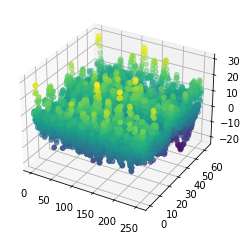

In [16]:
channels = np.arange(0,64)
samples = np.arange(0,255)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# arr = np.array(subject_trials)
# z, x, y = arr.nonzero()
column_one = [row[0] for row in graph_data]
column_two = [row[1] for row in graph_data]
column_three = [row[2] for row in graph_data]
ax.scatter(column_one, column_two, column_three, c=column_three, marker='o')
plt.show()

In [215]:
subject_trials[0][0].shape

(64, 1)

In [216]:
cur_trial = subject_trials[0]
cur_trial[0][1]

array([-8.219])

In [217]:
TrialNum[0]

[-2.981,
 -4.934,
 -7.375,
 -8.84,
 -9.816,
 -9.816,
 -8.84,
 -6.887,
 -3.957,
 -2.492,
 -2.004,
 -4.445,
 -6.887,
 -8.84,
 -9.328,
 -8.352,
 -7.375,
 -7.863,
 -9.816,
 -12.258,
 -13.723,
 -13.234,
 -11.77,
 -10.305,
 -9.328,
 -9.328,
 -10.305,
 -9.816,
 -9.328,
 -8.352,
 -7.863,
 -8.84,
 -10.305,
 -9.816,
 -6.887,
 -2.492,
 1.902,
 3.855,
 3.855,
 2.391,
 1.414,
 1.902,
 2.879,
 2.391,
 0.926,
 -1.516,
 -3.469,
 -5.422,
 -7.375,
 -9.816,
 -12.746,
 -14.211,
 -14.211,
 -11.77,
 -9.328,
 -8.84,
 -11.77,
 -17.141,
 -21.535,
 -23.0,
 -20.559,
 -17.629,
 -15.188,
 -14.699,
 -15.188,
 -14.699,
 -12.746,
 -11.281,
 -10.793,
 -11.77,
 -13.723,
 -14.211,
 -14.699,
 -14.211,
 -15.676,
 -18.606,
 -21.535,
 -23.488,
 -23.977,
 -23.977,
 -23.977,
 -24.465,
 -25.441,
 -23.977,
 -21.535,
 -19.094,
 -17.141,
 -16.652,
 -17.141,
 -17.141,
 -16.164,
 -14.211,
 -12.746,
 -12.258,
 -14.211,
 -17.629,
 -22.024,
 -26.418,
 -28.859,
 -28.371,
 -25.93,
 -22.024,
 -18.606,
 -16.164,
 -14.699,
 -14.211,
 -14.2

In [218]:
#MASTER Array of all subjects [Subject number 1-122]
    ##Contains an array of each subject trial number[Varies]
        ##Contains matrix that has [Channel][Sample number]
            #NOTE index [64][256] is condition number
#Solution array of alcoholic/Control

In [219]:
subject[0]

[[-1.038,
  -3.479,
  -5.92,
  -7.385,
  -6.409,
  -3.479,
  -0.061,
  2.38,
  2.869,
  1.404,
  0.427,
  -0.061,
  0.427,
  0.427,
  -0.549,
  -3.967,
  -7.385,
  -10.315,
  -11.292,
  -10.803,
  -8.85,
  -7.385,
  -5.92,
  -3.967,
  -2.014,
  -0.061,
  1.404,
  1.892,
  -0.061,
  -2.502,
  -4.944,
  -6.409,
  -5.92,
  -3.967,
  -1.526,
  -0.061,
  -1.038,
  -3.479,
  -5.92,
  -7.385,
  -7.385,
  -5.92,
  -4.456,
  -4.456,
  -4.456,
  -3.479,
  -1.526,
  1.892,
  4.822,
  5.31,
  3.357,
  -0.061,
  -3.967,
  -6.409,
  -7.385,
  -6.897,
  -6.409,
  -5.92,
  -6.409,
  -6.897,
  -7.874,
  -8.362,
  -9.338,
  -10.803,
  -12.756,
  -14.221,
  -14.709,
  -13.733,
  -11.78,
  -9.827,
  -8.362,
  -8.362,
  -8.85,
  -9.827,
  -8.85,
  -6.897,
  -4.944,
  -3.479,
  -4.944,
  -7.385,
  -10.315,
  -11.292,
  -10.803,
  -8.85,
  -6.897,
  -5.92,
  -6.409,
  -6.897,
  -6.897,
  -5.432,
  -3.479,
  -2.502,
  -3.479,
  -6.897,
  -10.803,
  -14.221,
  -15.686,
  -15.686,
  -15.198,
  -14.709,
  -14.22

In [17]:
# covarianceMatrix takes a matrix A and returns the covariance matrix, scaled by the variance
def covarianceMatrix(A):
    Ca = np.dot(A,np.transpose(A))/np.trace(np.dot(A,np.transpose(A)))
    return Ca

In [18]:
# spatialFilter returns the spatial filter SFa for mean covariance matrices Ra and Rb
def spatialFilter(Ra,Rb):
    R = Ra + Rb
    E,U = la.eig(R)

    # CSP requires the eigenvalues E and eigenvector U be sorted in descending order
    ord = np.argsort(E)
    ord = ord[::-1] # argsort gives ascending order, flip to get descending
    E = E[ord]
    U = U[:,ord]
#     print(E)
#     print(U)

    # Find the whitening transformation matrix
    P = np.dot(np.sqrt(la.inv(np.diag(E))),np.transpose(U))
#     print(P)

    # The mean covariance matrices may now be transformed
    Sa = np.dot(P,np.dot(Ra,np.transpose(P)))
    Sb = np.dot(P,np.dot(Rb,np.transpose(P)))
#     print(Sa)
#     print(Sb)
    Sa = Sa.real
    Sb = Sb.real

    # Find and sort the generalized eigenvalues and eigenvector
    E1,U1 = la.eig(Sa,Sb)
    ord1 = np.argsort(E1)
    ord1 = ord1[::-1]
    E1 = E1[ord1]
    U1 = U1[:,ord1]

    # The projection matrix (the spatial filter) may now be obtained
    SFa = np.dot(np.transpose(U1),P)
    return SFa.astype(np.float32)

In [19]:
# CSP takes any number of arguments, but each argument must be a collection of trials associated with a task
# That is, for N tasks, N arrays are passed to CSP each with dimensionality (# of trials of task N) x (feature vector)
# Trials may be of any dimension, provided that each trial for each task has the same dimensionality,
# otherwise there can be no spatial filtering since the trials cannot be compared
def CSP(*tasks):
    if len(tasks) < 2:
        print("Must have at least 2 tasks for filtering.")
        return (None,) * len(tasks)
    else:
        filters = ()
        # CSP algorithm
        # For each task x, find the mean variances Rx and not_Rx, which will be used to compute spatial filter SFx
        iterator = range(0,len(tasks))
        for x in iterator:
            # Find Rx
            Rx = covarianceMatrix(tasks[x][0])
            for t in range(1,len(tasks[x])):
                Rx += covarianceMatrix(tasks[x][t])
            Rx = Rx / len(tasks[x])
#             print(Rx)

            # Find not_Rx
            count = 0
            not_Rx = Rx * 0
            for not_x in [element for element in iterator if element != x]:
                for t in range(0,len(tasks[not_x])):
                    not_Rx += covarianceMatrix(tasks[not_x][t])
                    count += 1
            not_Rx = not_Rx / count
#             print(not_Rx)

            # Find the spatial filter SFx
            SFx = spatialFilter(Rx,not_Rx)
            filters += (SFx,)

            # Special case: only two tasks, no need to compute any more mean variances
            if len(tasks) == 2:
                filters += (spatialFilter(not_Rx,Rx),)
                break
        return filters

In [20]:
# code for running CSP on all subjects
all_filters = []
for ind in range(len(all_subjects)):
    filters = CSP(*all_subjects[ind])
    all_filters.append(filters)

/var/folders/8y/j7l5y6h53gv8ccm3gp_9x3tc0000gn/T/ipykernel_79442/4245590208.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  return SFa.astype(np.float32)


In [21]:
len(all_filters)

6

In [22]:
graph_data = []
data_point = all_filters[0][0]
for idx, i in enumerate(data_point):
    for idx2, j in enumerate(data_point[idx]):
        point = [idx, idx2, data_point[idx][idx2]]
        graph_data.append(point)

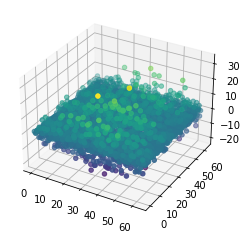

In [23]:
channels = np.arange(0,64)
samples = np.arange(0,255)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# arr = np.array(subject_trials)
# z, x, y = arr.nonzero()
column_one = [row[0] for row in graph_data]
column_two = [row[1] for row in graph_data]
column_three = [row[2] for row in graph_data]
ax.scatter(column_one, column_two, column_three, c=column_three, marker='o')
plt.show()